<a href="https://colab.research.google.com/github/kty3452/ML-Class/blob/main/week3/wisdomDatasetCNNv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 로드 및 탐색

### Subtask:
지정된 파일에서 데이터를 로드하고 구조 및 내용을 검사합니다.


**Reasoning**:
Load the data from the specified file into a pandas DataFrame, displaying the first few rows, and showing the info and description of the DataFrame, as well as the value counts of the 'activity' column.



In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

# Manually read and parse the data line by line
# 데이터를 줄 단위로 수동으로 읽고 구문 분석합니다.
data = []
with open('/content/drive/MyDrive/ML_Class/WISDM_ar_v1.1_raw.txt', 'r') as f:
    for line in f:
        # Remove trailing whitespace and the potential semicolon
        # 후행 공백과 있을 수 있는 세미콜론을 제거합니다.
        line = line.strip().replace(';', '')
        # Split the line by comma
        # 쉼표로 줄을 분할합니다.
        parts = line.split(',')
        # Check if the line has the expected number of parts (6)
        # 줄에 예상되는 부분 수(6)가 있는지 확인합니다.
        if len(parts) == 6:
            try:
                # Convert parts to appropriate data types
                # 부분을 적절한 데이터 유형으로 변환합니다.
                user = int(parts[0])
                activity = parts[1]
                timestamp = int(parts[2])
                x = float(parts[3])
                y = float(parts[4])
                z = float(parts[5])
                data.append([user, activity, timestamp, x, y, z])
            except ValueError:
                # Skip lines with incorrect data types
                # 잘못된 데이터 유형의 줄은 건너뜁니다.
                continue
        else:
             # Optionally, print lines that don't have 6 parts to understand the issue
             # 문제를 이해하기 위해 6개 부분이 없는 줄을 선택적으로 출력할 수 있습니다.
             # print(f"Skipping line with unexpected number of fields: {line}")
             continue

# Create a DataFrame from the parsed data
# 구문 분석된 데이터로 DataFrame을 만듭니다.
df_raw = pd.DataFrame(data, columns=['user', 'activity', 'timestamp', 'x', 'y', 'z'])

# Display the first 5 rows to verify data loading
# 수동 구문 분석 후 데이터 로드를 확인하기 위해 처음 5개 행을 표시합니다.
print("First 5 rows of the DataFrame after manual parsing:")
display(df_raw.head())

# Print the DataFrame's info to check column types and non-null counts
# 수동 구문 분석 후 열 유형 및 null이 아닌 개수를 확인하기 위해 DataFrame 정보 출력
print("\nDataFrame Info after manual parsing:")
df_raw.info()

# Print descriptive statistics to understand the distribution of numerical columns
# 수동 구문 분석 후 숫자 열의 분포를 이해하기 위해 기술 통계 출력
print("\nDataFrame Description after manual parsing:")
display(df_raw.describe())

# Check unique activity types and their counts
# 수동 구문 분석 후 고유 활동 유형 및 개수 확인
print("\nActivity counts after manual parsing:")
display(df_raw['activity'].value_counts())

First 5 rows of the DataFrame after manual parsing:


,user,activity,timestamp,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164



DataFrame Info after manual parsing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086465 entries, 0 to 1086464
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1086465 non-null  int64  
 1   activity   1086465 non-null  object 
 2   timestamp  1086465 non-null  int64  
 3   x          1086465 non-null  float64
 4   y          1086465 non-null  float64
 5   z          1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB

DataFrame Description after manual parsing:


,user,timestamp,x,y,z
count,1.086465e+06,1.086465e+06,1.086465e+06,1.086465e+06,1.086465e+06
mean,1.883756e+01,3.250279e+13,6.641130e-01,7.246045e+00,3.976974e-01
std,1.026681e+01,4.893650e+13,6.876277e+00,6.739789e+00,4.761111e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,1.999712e+12,-2.910000e+00,3.170000e+00,-2.220117e+00
50%,1.900000e+01,9.396203e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,3.509473e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01



Activity counts after manual parsing:


,count
activity,
Walking,418393
Jogging,336445
Upstairs,122869
Downstairs,100425
Sitting,59939
Standing,48394


## 데이터 전처리

### Subtask:
CNN 모델에 맞게 데이터를 전처리합니다. 여기에는 누락된 값 처리, 데이터 스케일링, 시계열 데이터를 CNN 입력 형식에 맞게 재구성하는 작업이 포함될 수 있습니다.


**Reasoning**:
The first step is to convert the 'timestamp' column to datetime objects.



In [ ]:
# Convert the 'timestamp' column to datetime objects
# The timestamp values appear to be in microseconds or nanoseconds since the epoch.
# Assuming microseconds based on the scale, convert to seconds for datetime conversion.
# 'timestamp' 열을 datetime 객체로 변환합니다.
# 타임스탬프 값은 epoch 이후 마이크로초 또는 나노초 단위인 것으로 보입니다.
# 규모를 기준으로 마이크로초라고 가정하고 datetime 변환을 위해 초 단위로 변환합니다.
df_raw['timestamp_datetime'] = pd.to_datetime(df_raw['timestamp'], unit='us')

# Display the first few rows with the new column
# 새 열이 포함된 처음 몇 개 행을 표시합니다.
print("DataFrame with timestamp_datetime column:")
display(df_raw.head())

DataFrame with timestamp_datetime column:


,user,activity,timestamp,x,y,z,timestamp_datetime
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1971-07-23 08:32:42.326
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1971-07-23 08:34:22.271
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1971-07-23 08:35:12.167
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1971-07-23 08:37:02.305
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1971-07-23 08:38:52.290


**Reasoning**:
Now I will identify and handle duplicate entries in the DataFrame and check for any remaining missing values.



In [ ]:
# Identify and handle duplicate entries
# 중복 항목 식별 및 처리
print("\nChecking for duplicate rows:")
print(f"Number of duplicate rows before dropping: {df_raw.duplicated().sum()}")

# Drop duplicate rows
# 중복 행을 삭제합니다.
df_raw.drop_duplicates(inplace=True)

print(f"Number of duplicate rows after dropping: {df_raw.duplicated().sum()}")

# 3. Handle missing values (double-check)
# 3. 누락된 값 처리 (재확인)
print("\nChecking for missing values after dropping duplicates:")
print(df_raw.isnull().sum())

# 4. Address potential semicolon issue in 'z' column (already handled in manual parsing, but verify data type)
# The manual parsing already ensured the 'z' column is float.
# We can double check the data type of 'z' column.
# 4. 'z' 열의 잠재적인 세미콜론 문제 해결 (수동 구문 분석에서 이미 처리되었지만 데이터 유형 확인)
# 수동 구문 분석을 통해 이미 'z' 열이 float인지 확인했습니다.
# 'z' 열의 데이터 유형을 다시 확인할 수 있습니다.
print("\nData type of 'z' column:")
print(df_raw['z'].dtype)


Checking for duplicate rows:
Number of duplicate rows before dropping: 66587
Number of duplicate rows after dropping: 0

Checking for missing values after dropping duplicates:
user                  0
activity              0
timestamp             0
x                     0
y                     0
z                     0
timestamp_datetime    0
dtype: int64

Data type of 'z' column:
float64


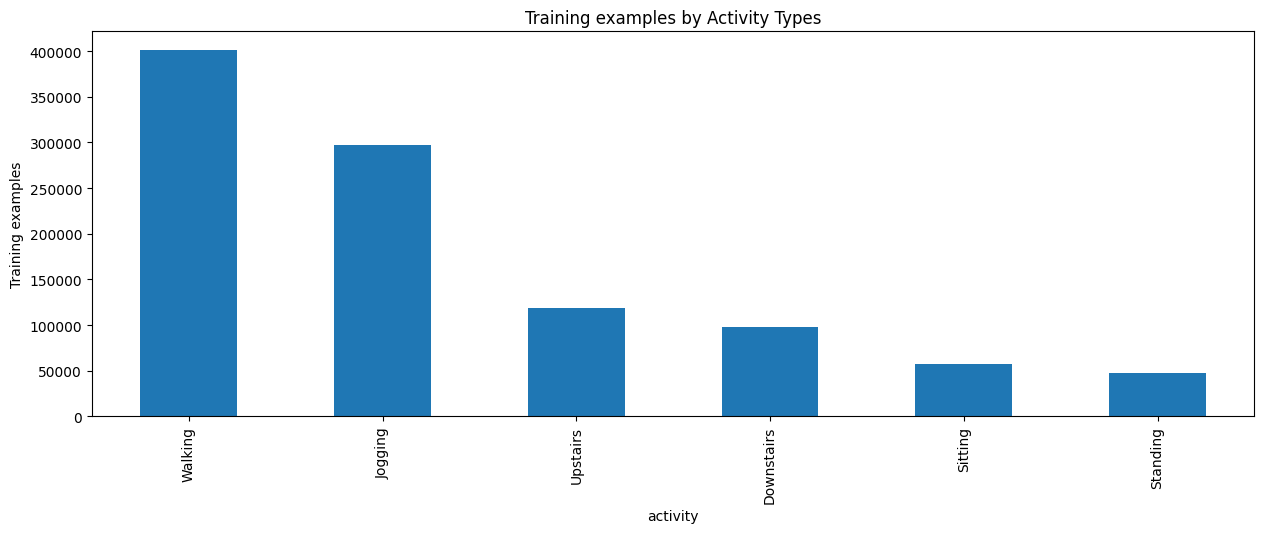

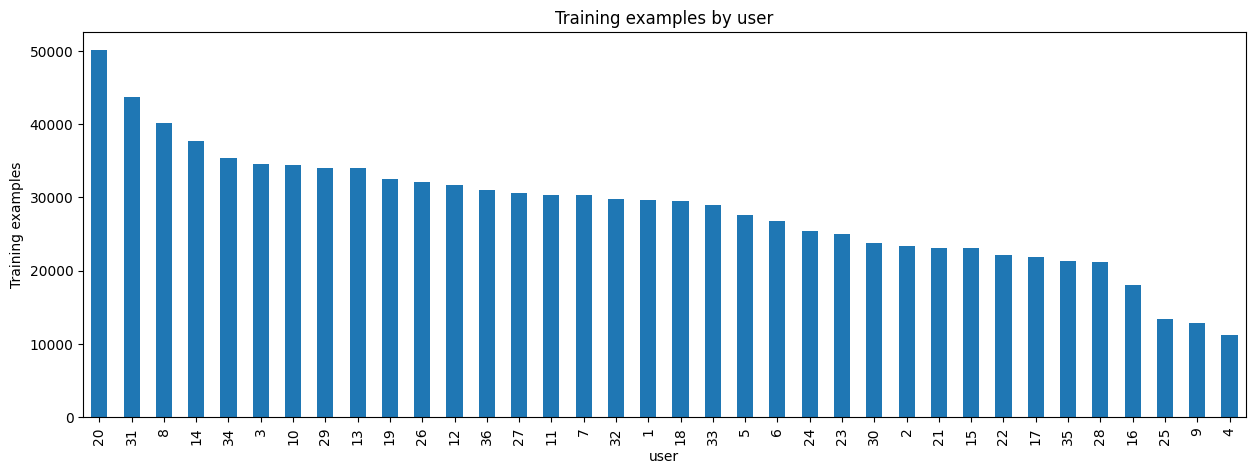

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.xlabel('Activity Type')
plt.ylabel('Training examples')
df_raw['activity'].value_counts().plot(kind='bar',
                                  title='Training examples by Activity Types')
plt.show()

plt.figure(figsize=(15, 5))
plt.xlabel('User')
plt.ylabel('Training examples')
df_raw['user'].value_counts().plot(kind='bar',
                                 title='Training examples by user')
plt.show()

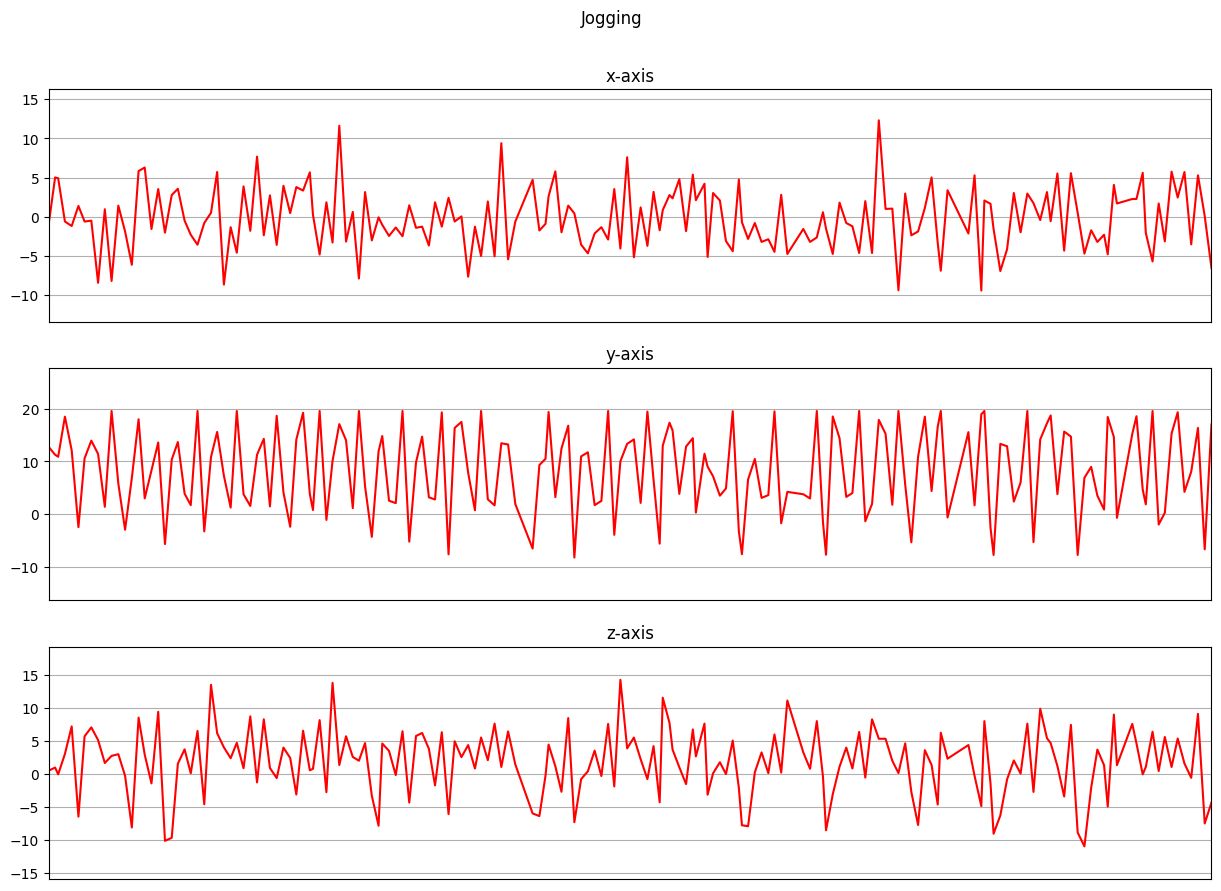

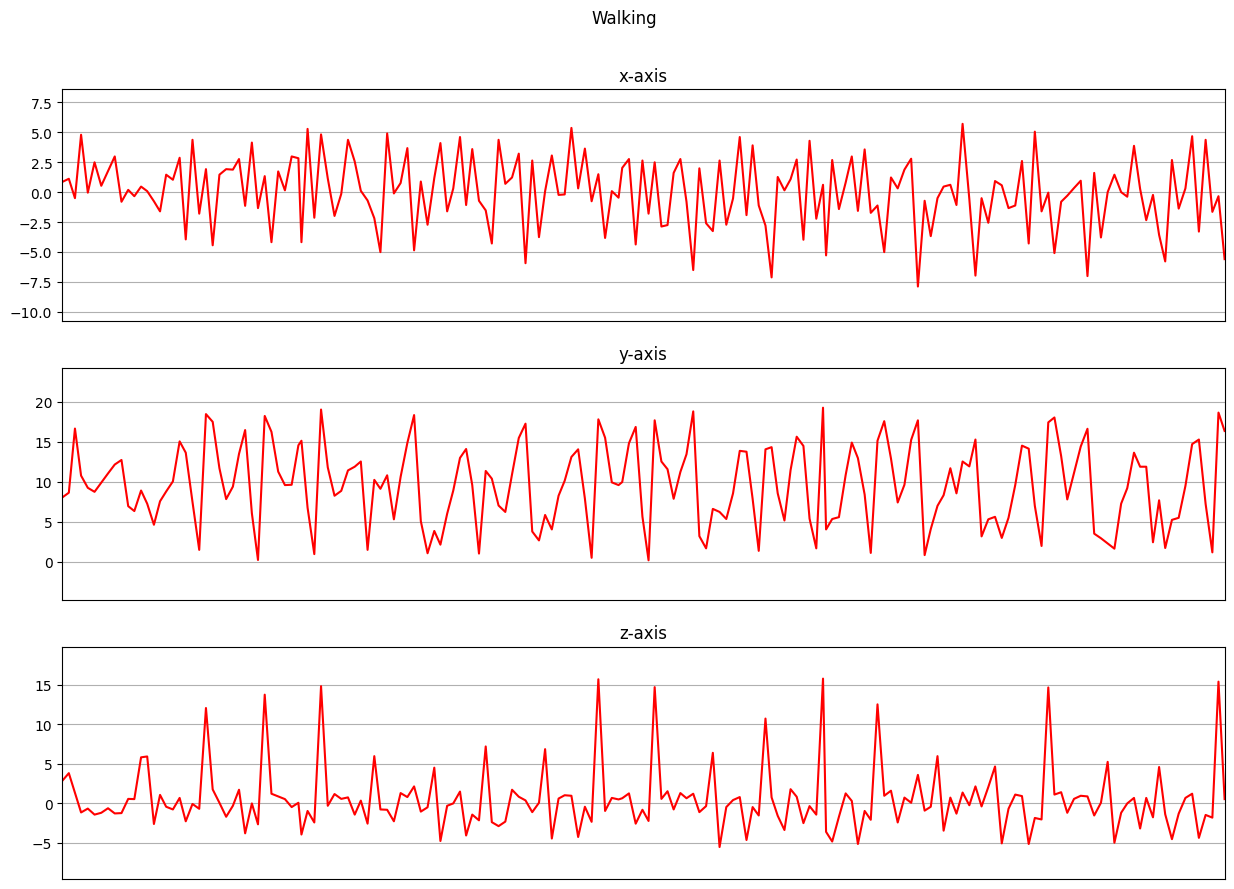

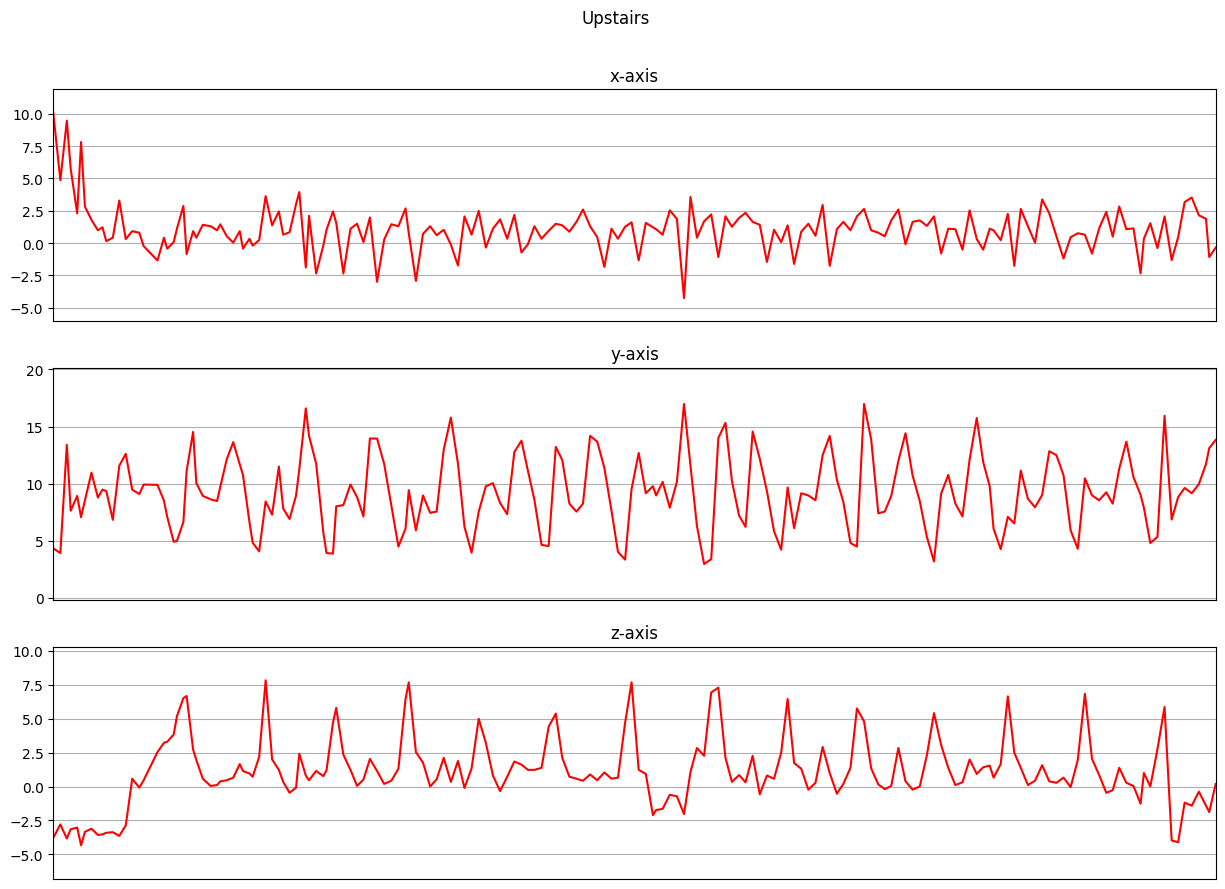

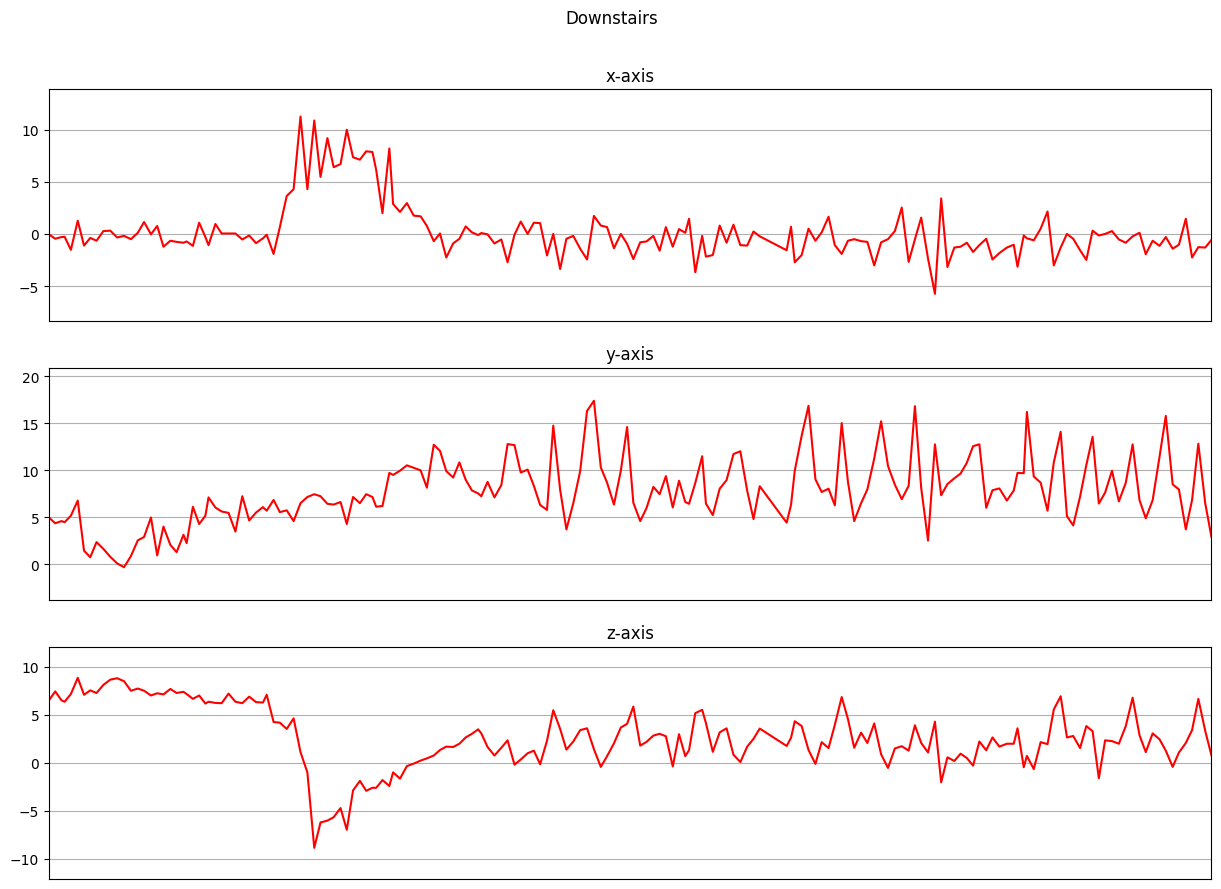

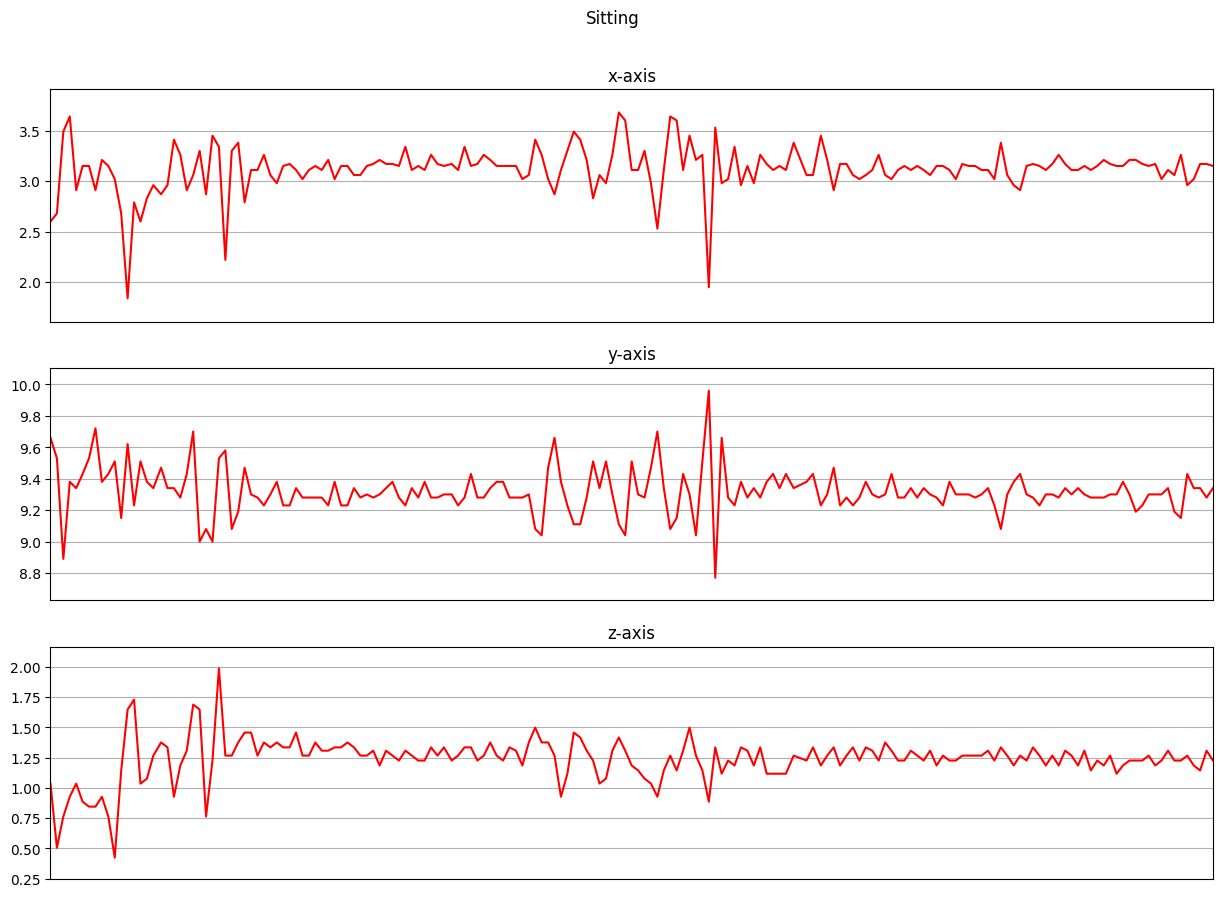

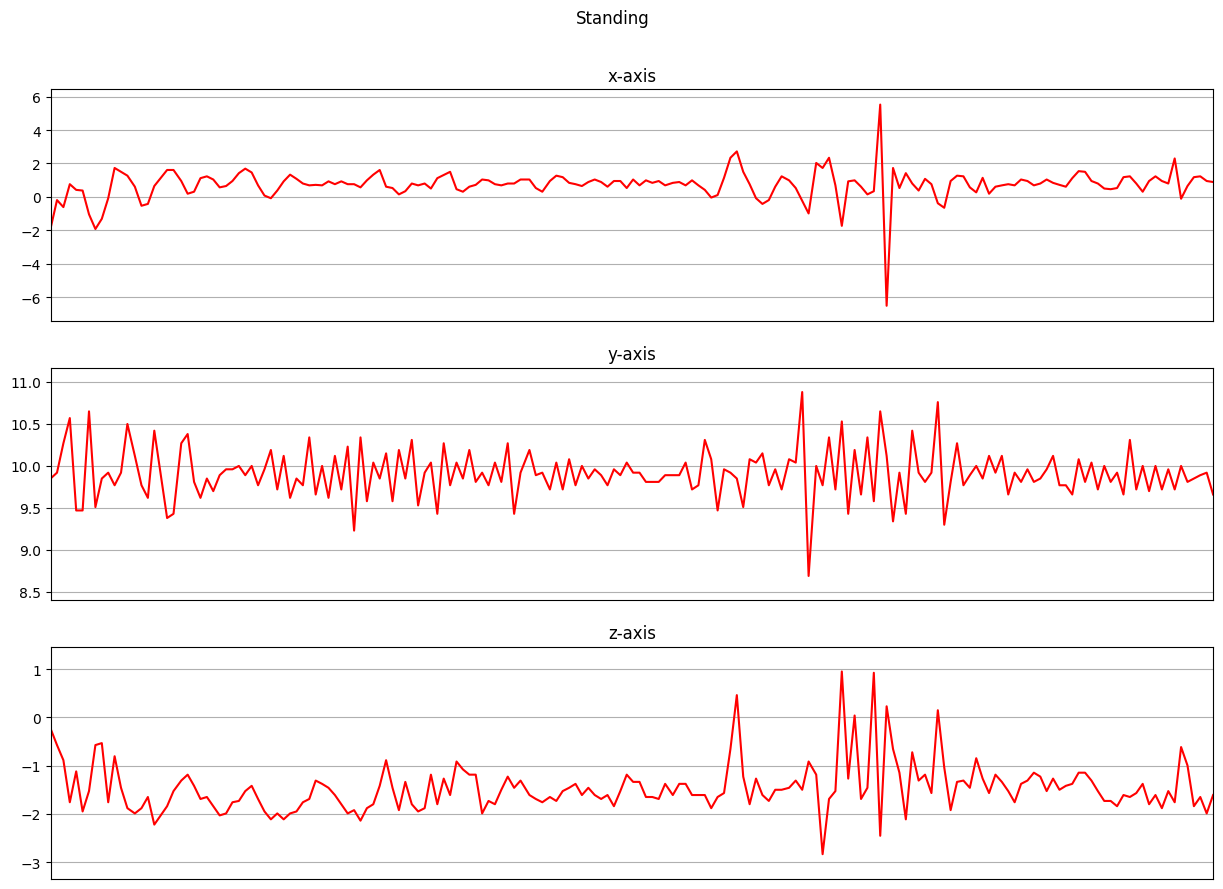

In [ ]:
import numpy as np

def axis_plot(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in df_raw['activity'].unique():
    limit = df_raw[df_raw['activity'] == activity][:180]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
    axis_plot(ax0, limit['timestamp'], limit['x'], 'x-axis')
    axis_plot(ax1, limit['timestamp'], limit['y'], 'y-axis')
    axis_plot(ax2, limit['timestamp'], limit['z'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

In [ ]:
# Prepare time series data for CNN by creating fixed-size windows
# Modified create_windows function to use pandas mode()
# 고정 크기 윈도우 생성을 통해 CNN용 시계열 데이터 준비
# pandas mode()를 사용하도록 수정된 create_windows 함수
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder

# Modified create_windows to handle a single DataFrame with a fixed overlap size
# 고정된 겹침 크기를 가진 단일 DataFrame을 처리하도록 create_windows 수정
def create_windows(df_activity, window_size, overlap_size):
    """
    Create sliding windows from the time series data for a single activity.

    Args:
        df_activity (pd.DataFrame): The input DataFrame for a single activity.
        window_size (int): The number of data points in each window.
        overlap_size (int): The number of overlapping data points between consecutive windows.

    Returns:
        tuple: A tuple containing two numpy arrays:
               - windows (np.ndarray): Shape (num_windows, window_size, num_features)
               - labels (np.ndarray): Shape (num_windows,) - Note: All labels in this case will be the same as it's for a single activity.
    """
    """
    단일 활동에 대한 시계열 데이터에서 슬라이딩 윈도우를 생성합니다.

    인수(Args):
        df_activity (pd.DataFrame): 단일 활동에 대한 입력 DataFrame입니다.
        window_size (int): 각 윈도우의 데이터 포인트 수입니다.
        overlap_size (int): 연속된 윈도우 간에 겹치는 데이터 포인트 수입니다.

    반환(Returns):
        tuple: 두 개의 numpy 배열을 포함하는 튜플:
               - windows (np.ndarray): 형태 (윈도우 수, 윈도우 크기, 특징 수)
               - labels (np.ndarray): 형태 (윈도우 수,) - 참고: 이 경우 모든 레이블은 단일 활동에 대한 것이므로 동일합니다.
    """
    windows = []
    labels = []
    step_size = window_size - overlap_size
    num_samples = len(df_activity)

    for i in range(0, num_samples - window_size + 1, step_size):
        # Extract window
        # 윈도우 추출
        window = df_activity.iloc[i : i + window_size][['x', 'y', 'z']].values
        windows.append(window)

        # Extract encoded label (the activity for this DataFrame)
        # 인코딩된 레이블 추출 (이 DataFrame에 대한 활동)
        # Assuming the activity is constant within this df_activity
        # 이 df_activity 내에서 활동이 일정하다고 가정
        label_encoded = df_activity['activity_encoded'].iloc[0] # Get the first (and assumed only) encoded activity
        labels.append(label_encoded)

    # Convert lists to numpy arrays and handle the case with no windows
    # 목록을 numpy 배열로 변환하고 윈도우가 없는 경우를 처리
    if not windows:
        return np.array([]).reshape(0, window_size, 3), np.array([])
    else:
        return np.array(windows), np.array(labels)


# Define window size and overlap (overlap will be determined per activity)
# 윈도우 크기 및 겹침 정의 (겹침은 활동별로 결정됨)
window_size = 80  # Example: 80 data points per window # 예시: 윈도우당 80개 데이터 포인트
# overlap_size will be determined later based on activity type # 겹침 크기는 나중에 활동 유형에 따라 결정됩니다.

In [ ]:
# Split data based on user ID
# 사용자 ID를 기준으로 데이터 분할
df_train = df_raw[df_raw['user'] <= 22].copy()
df_val = df_raw[(df_raw['user'] >= 23) & (df_raw['user'] <= 28)].copy()
df_test = df_raw[df_raw['user'] > 28].copy()

# Initialize LabelEncoder
# LabelEncoder 초기화
label_encoder = LabelEncoder()

# Fit and transform the labels for the entire dataset first to ensure consistent mapping
# 일관된 매핑을 위해 전체 데이터셋에 대해 레이블을 먼저 적합 및 변환합니다.
# Fit on the combined training, validation, and test data to ensure all classes are seen by the encoder
# 모든 클래스가 인코더에 의해 보이도록 훈련, 검증 및 테스트 데이터를 결합하여 적합
all_activities = pd.concat([df_train['activity'], df_val['activity'], df_test['activity']]).unique()
label_encoder.fit(all_activities)


df_train['activity_encoded'] = label_encoder.transform(df_train['activity'])
df_val['activity_encoded'] = label_encoder.transform(df_val['activity']) # Use the same encoder fitted on the combined data # 결합된 데이터에 적합된 동일한 인코더 사용
df_test['activity_encoded'] = label_encoder.transform(df_test['activity']) # Use the same encoder fitted on the combined data # 결합된 데이터에 적합된 동일한 인코더 사용


# Apply Robust Scaling to training, validation and test sets before creating windows
# 윈도우를 생성하기 전에 훈련, 검증 및 테스트 세트에 Robust Scaling을 적용합니다.
scaler = RobustScaler()

features_to_scale = ['x', 'y', 'z']

# Fit scaler only on the training data and transform all sets
# 훈련 데이터에만 스케일러를 적합하고 모든 세트를 변환합니다.
scaler.fit(df_train[features_to_scale])

df_train[features_to_scale] = scaler.transform(df_train[features_to_scale])
df_val[features_to_scale] = scaler.transform(df_val[features_to_scale]) # Use the same scaler fitted on the training data # 훈련 데이터에 적합된 동일한 스케일러 사용
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale]) # Use the same scaler fitted on the training data # 훈련 데이터에 적합된 동일한 스케일러 사용

# Determine majority and minority classes based on the original data distribution
# 원본 데이터 분포를 기반으로 다수 및 소수 클래스 결정
activity_counts = df_raw['activity'].value_counts()
majority_classes = activity_counts[activity_counts > activity_counts.median()].index.tolist() # Example threshold: above median count
minority_classes = activity_counts[activity_counts <= activity_counts.median()].index.tolist() # Example threshold: at or below median count

print("Majority Classes:", majority_classes)
print("Minority Classes:", minority_classes)

# Define overlap percentages
# 겹침 비율 정의
overlap_percentage_majority = 0.50 # 50%
overlap_percentage_minority = 0.75 # 75%


# Create windows with different overlaps based on activity for training, validation, and testing sets
# 훈련, 검증 및 테스트 세트에 대해 활동에 따라 다른 겹침으로 윈도우 생성

X_train_list, y_train_list = [], []
X_val_list, y_val_list = [], []
X_test_list, y_test_list = [], []

# Process training data
print("\nCreating windows for training data...")
for activity in df_train['activity'].unique():
    df_activity = df_train[df_train['activity'] == activity].copy()
    if activity in majority_classes:
        overlap_size = int(window_size * overlap_percentage_majority)
    else:
        overlap_size = int(window_size * overlap_percentage_minority)

    windows, labels = create_windows(df_activity, window_size, overlap_size)
    X_train_list.append(windows)
    y_train_list.append(labels)
    print(f"  Created {len(windows)} windows for activity '{activity}' with overlap {overlap_size}")


# Process validation data
print("\nCreating windows for validation data...")
for activity in df_val['activity'].unique():
    df_activity = df_val[df_val['activity'] == activity].copy()
    # Use the same majority/minority classification as training data
    if activity in majority_classes:
        overlap_size = int(window_size * overlap_percentage_majority)
    else:
        overlap_size = int(window_size * overlap_percentage_minority)

    windows, labels = create_windows(df_activity, window_size, overlap_size)
    X_val_list.append(windows)
    y_val_list.append(labels)
    print(f"  Created {len(windows)} windows for activity '{activity}' with overlap {overlap_size}")


# Process testing data
print("\nCreating windows for testing data...")
for activity in df_test['activity'].unique():
    df_activity = df_test[df_test['activity'] == activity].copy()
    # Use the same majority/minority classification as training data
    if activity in majority_classes:
        overlap_size = int(window_size * overlap_percentage_majority)
    else:
        overlap_size = int(window_size * overlap_percentage_minority)

    windows, labels = create_windows(df_activity, window_size, overlap_size)
    X_test_list.append(windows)
    y_test_list.append(labels)
    print(f"  Created {len(windows)} windows for activity '{activity}' with overlap {overlap_size}")


# Concatenate windows and labels from all activities
# 모든 활동의 윈도우 및 레이블 연결
X_train = np.concatenate(X_train_list, axis=0) if X_train_list else np.array([])
y_train = np.concatenate(y_train_list, axis=0) if y_train_list else np.array([])
X_val = np.concatenate(X_val_list, axis=0) if X_val_list else np.array([])
y_val = np.concatenate(y_val_list, axis=0) if y_val_list else np.array([])
X_test = np.concatenate(X_test_list, axis=0) if X_test_list else np.array([])
y_test = np.concatenate(y_test_list, axis=0) if X_test_list else np.array([])


print(f"\nShape of X_train after per-activity windowing: {X_train.shape}")
print(f"Shape of y_train after per-activity windowing: {y_train.shape}")
print(f"Shape of X_val after per-activity windowing: {X_val.shape}")
print(f"Shape of y_val after per-activity windowing: {y_val.shape}")
print(f"Shape of X_test after per-activity windowing: {X_test.shape}")
print(f"Shape of y_test after per-activity windowing: {y_test.shape}")


Majority Classes: ['Walking', 'Jogging', 'Upstairs']
Minority Classes: ['Downstairs', 'Sitting', 'Standing']

Creating windows for training data...
  Created 6250 windows for activity 'Walking' with overlap 40
  Created 4413 windows for activity 'Jogging' with overlap 40
  Created 1838 windows for activity 'Upstairs' with overlap 40
  Created 2869 windows for activity 'Downstairs' with overlap 60
  Created 1875 windows for activity 'Sitting' with overlap 60
  Created 1461 windows for activity 'Standing' with overlap 60

Creating windows for validation data...
  Created 1455 windows for activity 'Walking' with overlap 40
  Created 1284 windows for activity 'Jogging' with overlap 40
  Created 423 windows for activity 'Upstairs' with overlap 40
  Created 740 windows for activity 'Downstairs' with overlap 60
  Created 132 windows for activity 'Sitting' with overlap 60
  Created 168 windows for activity 'Standing' with overlap 60

Creating windows for testing data...
  Created 1736 windows 

In [ ]:
# Display the first window and its label as an example for training data
# 훈련 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst training window example:")
print(X_train[0])
print(f"\nLabel of the first training window: {y_train[0]}")

# Display the first window and its label as an example for validation data
# 검증 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst validation window example:")
print(X_val[0])
print(f"\nLabel of the first validation window: {y_val[0]}")

# Display the first window and its label as an example for testing data
# 테스트 데이터의 예시로 첫 번째 윈도우와 해당 레이블을 표시합니다.
print("\nFirst testing window example:")
print(X_test[0])
print(f"\nLabel of the first testing window: {y_test[0]}")

# Print the mapping of activities to encoded labels
# 활동과 인코딩된 레이블 매핑 출력
print("\nMapping of activities to encoded labels:")
for i, activity in enumerate(label_encoder.classes_):
    print(f"{activity}: {i}")


First training window example:
[[ 5.50126496e-02  2.49579146e-01 -9.93708943e-02]
 [-1.95517297e-02  2.97489950e-01 -1.07637288e-01]
 [-4.97325499e-02  2.54712437e-01 -1.32436457e-01]
 [-2.29628548e-05  2.83801256e-01 -9.38599674e-02]
 [-2.29628548e-05  2.92356658e-01 -1.15903679e-01]
 [ 6.03386764e-02  2.68401256e-01 -1.32436457e-01]
 [-5.34899088e-03  2.73534548e-01 -9.38599674e-02]
 [-3.37544685e-02  2.78667965e-01 -9.93708943e-02]
 [-3.02037844e-02  2.88934548e-01 -6.90607935e-02]
 [ 2.12811453e-02  2.73534548e-01 -1.15903679e-01]
 [ 2.48318307e-02  2.73534548e-01 -1.07637288e-01]
 [ 3.01578574e-02  2.83801256e-01 -9.93708943e-02]
 [ 1.59551199e-02  2.78667965e-01 -9.38599674e-02]
 [ 3.01578574e-02  2.73534548e-01 -1.15903679e-01]
 [ 4.61359376e-02  2.78667965e-01 -1.15903679e-01]
 [ 4.08099108e-02  2.73534548e-01 -7.73271848e-02]
 [ 4.61359376e-02  2.73534548e-01 -7.73271848e-02]
 [ 3.01578574e-02  2.73534548e-01 -6.07944022e-02]
 [ 2.12811453e-02  2.68401256e-01 -6.90607935e-02]

## 데이터 증강

### Subtask:
훈련 데이터의 다양성을 높이기 위해 시계열 데이터 증강 기법을 적용합니다.

**Reasoning**:
Define the time series data augmentation functions based on the techniques discussed previously (Jittering, Scaling, Time Warping, Magnitude Warping, Permutation, Window Slicing).

In [ ]:
import numpy as np

# 1. Jittering: Add Gaussian noise
# 가우시안 노이즈 추가
def jitter(X, sigma=0.03):
    """
    Add random noise to the time series data.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        sigma (float): Standard deviation of the Gaussian noise.

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Apply noise to each window
    return X + np.random.normal(loc=0., scale=sigma, size=X.shape)

# 2. Scaling: Multiply by a random scalar
# 무작위 스칼라 곱하기
def scaling(X, sigma=0.1):
    """
    Scale the amplitude of the time series data by a random factor.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        sigma (float): Standard deviation of the scaling factor.

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Generate scaling factors for each window
    factor = np.random.normal(loc=1., scale=sigma, size=(X.shape[0], 1, X.shape[2]))
    return X * factor

# 3. Time Warping (Simplified): Stretch or compress the time axis
# 시간 축 늘리거나 압축하기 (간소화)
# This is a simplified version and might not be a full DTW-based time warping.
# Full Time Warping often requires more complex interpolation and control points.
# This version uses a random cubic interpolation.
from scipy.interpolate import CubicSpline
from scipy.signal import resample

def time_warp(X, sigma=0.2):
    """
    Stretch or compress the time series along the time axis.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        sigma (float): Standard deviation for random time points.

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Apply time warping to each window
    X_aug = np.zeros_like(X)
    for i in range(X.shape[0]):
        # Generate random time points
        tt = np.linspace(0, X.shape[1] - 1, X.shape[1])
        t_new = tt + np.random.normal(loc=0., scale=sigma, size=X.shape[1])
        t_new[0] = 0
        t_new[-1] = X.shape[1] - 1

        # Create a cubic spline interpolation for the new time points
        # Use the original time points (tt) and the generated new time points (t_new) for the spline
        cs_t = CubicSpline(tt, t_new)

        # Interpolate the original data X[i] at the new time points generated by the spline
        # We need to interpolate the *data* X[i] based on the warped time axis cs_t(tt)
        # The interpolate function expects sorted x values, so use cs_t(tt) as the new "time" points
        # And X[i] as the "data" points at original times tt
        # We then evaluate the interpolation at the original time points tt to get the warped data

        # Create an interpolation function for each feature of X[i] based on original time points tt
        interp_funcs = [CubicSpline(tt, X[i, :, j]) for j in range(X.shape[2])]

        # Evaluate these interpolation functions at the warped time points cs_t(tt)
        # Need to ensure cs_t(tt) is within the bounds of tt for interpolation
        warped_tt = np.clip(cs_t(tt), 0, X.shape[1] - 1) # Clip warped time points to valid range

        X_aug[i] = np.array([interp_funcs[j](warped_tt) for j in range(X.shape[2])]).T


    return X_aug


# 4. Magnitude Warping (Simplified): Apply a smooth random curve to magnitude
# 저주파 곡선으로 진폭 변형 (간소화)
def magnitude_warp(X, sigma=0.05, num_knots=4):
    """
    Apply a smooth random curve to the amplitude of the time series data.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        sigma (float): Standard deviation for random magnitude points.
        num_knots (int): Number of knots for the cubic spline.

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Apply magnitude warping to each window
    X_aug = np.zeros_like(X)
    window_size = X.shape[1]
    tt = np.linspace(0, window_size - 1, num_knots)

    for i in range(X.shape[0]):
        # Generate random magnitude points for each feature
        mag_new = np.random.normal(loc=1., scale=sigma, size=(num_knots, X.shape[2]))

        # Create a cubic spline interpolation for magnitude for each feature
        cs_mag = [CubicSpline(tt, mag_new[:, j]) for j in range(X.shape[2])]

        # Apply the magnitude warp curve to each feature
        warp_curve = np.array([cs_mag[j](np.arange(window_size)) for j in range(X.shape[2])]).T
        X_aug[i] = X[i] * warp_curve

    return X_aug


# 5. Permutation: Swap random segments
# 무작위 세그먼트 교환
def permutation(X, num_segments=5):
    """
    Swap random segments within the time series data.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        num_segments (int): Number of segments to divide the window into.

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Apply permutation to each window
    X_aug = np.zeros_like(X)
    segment_size = X.shape[1] // num_segments
    for i in range(X.shape[0]):
        segments = []
        for j in range(num_segments):
            start = j * segment_size
            end = start + segment_size if j < num_segments - 1 else X.shape[1]
            segments.append(X[i, start:end, :])

        # Shuffle the segments
        np.random.shuffle(segments)

        # Concatenate the shuffled segments
        X_aug[i] = np.concatenate(segments, axis=0)

    return X_aug

# 6. Window Slicing: Randomly slice and resize
# 무작위로 잘라내고 크기 조정
def window_slicing(X, reduce_ratio=0.9):
    """
    Randomly slice a portion of the window and resize it to the original size.

    Args:
        X (np.ndarray): Input time series data (shape: num_samples, window_size, num_features).
        reduce_ratio (float): The ratio to reduce the window size by before resizing (e.g., 0.9 means slice 90% and resize).

    Returns:
        np.ndarray: Augmented time series data.
    """
    # Apply window slicing to each window
    X_aug = np.zeros_like(X)
    window_size = X.shape[1]
    target_len = int(window_size * reduce_ratio)

    for i in range(X.shape[0]):
        # Ensure target_len is at least 1 and less than window_size
        if target_len < 1:
            target_len = 1
        if target_len >= window_size:
             target_len = window_size - 1

        # Randomly choose a starting point for the slice
        start = np.random.randint(0, window_size - target_len + 1)
        end = start + target_len

        # Slice the window
        sliced_window = X[i, start:end, :]

        # Resize the sliced window back to the original window size using interpolation
        # Using linear interpolation
        resized_window = np.zeros((window_size, X.shape[2]))
        for feature in range(X.shape[2]):
             resized_window[:, feature] = np.interp(np.linspace(0, target_len - 1, window_size),
                                                    np.arange(target_len),
                                                    sliced_window[:, feature])
        X_aug[i] = resized_window

    return X_aug

print("Data augmentation functions defined.")

Data augmentation functions defined.


**Reasoning**:
Apply the defined data augmentation functions to the training data (`X_train`, `y_train`) to create an augmented training dataset. Experiment with combining different augmentation techniques.

In [ ]:
# Apply data augmentation to the training data to balance class distribution
# 훈련 데이터에 데이터 증강을 적용하여 클래스 분포의 균형을 맞춥니다.

X_train_augmented_list = []
y_train_augmented_list = []

# Assuming 'minority_classes' variable (list of minority class names) is available from previous steps
# 이전 단계에서 'minority_classes' 변수(소수 클래스 이름 목록)를 사용할 수 있다고 가정합니다.
# Assuming 'label_encoder' is available to map class names to encoded labels
# 레이블 인코더를 사용하여 클래스 이름을 인코딩된 레이블에 매핑할 수 있다고 가정합니다.
# Assuming y_train contains integer labels (after windowing, before any potential one-hot encoding)
# y_train에 정수 레이블이 포함되어 있다고 가정합니다 (윈도우링 후, 잠재적인 원-핫 인코딩 전).
y_train_int = y_train # Use y_train directly as it should contain integer labels at this point # 이 시점에서 y_train에 정수 레이블이 포함되어야 하므로 y_train을 직접 사용합니다.


# Calculate the target number of samples for each class (e.g., the count of the majority class)
# 각 클래스에 대한 목표 샘플 수 계산 (예: 다수 클래스의 수)
original_counts = pd.Series(y_train_int).value_counts()
max_count = original_counts.max()
print(f"Original class counts in training data:\n{original_counts}")
print(f"Target count for each class: {max_count}")


# Iterate through each activity
# 각 활동을 반복합니다.
for activity_encoded in np.unique(y_train_int):
    activity_name = label_encoder.inverse_transform([activity_encoded])[0] # Get activity name from encoded label # 인코딩된 레이블에서 활동 이름 가져오기
    current_count = original_counts[activity_encoded]

    # Select windows belonging to this activity
    # 이 활동에 속하는 윈도우를 선택합니다.
    activity_indices = np.where(y_train_int == activity_encoded)[0]
    X_train_activity = X_train[activity_indices]
    y_train_activity = y_train_int[activity_indices] # Use integer labels # 정수 레이블 사용

    # Add original samples of this class
    # 이 클래스의 원래 샘플 추가
    X_train_augmented_list.append(X_train_activity)
    y_train_augmented_list.append(y_train_activity)

    # Check if augmentation is needed for this class
    # 이 클래스에 대한 증강이 필요한지 확인합니다.
    if current_count < max_count:
        print(f"Augmenting class: {activity_name} (Current count: {current_count})")
        # Calculate how many samples to generate
        # 생성할 샘플 수 계산
        samples_to_generate = max_count - current_count

        # Determine how many augmentation steps are needed per original sample
        # 원본 샘플당 필요한 증강 단계 수 결정
        # Simple approach: repeat augmentation until target count is reached (can lead to duplicates if not careful)
        # Or, apply multiple augmentations to each original sample.
        # Let's use a simple repetition and apply multiple augmentations per repetition.
        # 간단한 접근 방식: 목표 개수에 도달할 때까지 증강 반복 (주의하지 않으면 중복 발생 가능)
        # 또는 각 원본 샘플에 여러 증강을 적용합니다.
        # 간단한 반복을 사용하고 반복당 여러 증강을 적용해 보겠습니다.

        X_aug_for_activity = X_train_activity.copy() # Start with original samples for augmentation # 증강을 위해 원본 샘플로 시작
        y_aug_for_activity = y_train_activity.copy() # Labels remain the same # 레이블은 동일하게 유지됩니다.

        # Determine number of augmentations needed per original sample to reach target
        # 목표에 도달하기 위해 원본 샘플당 필요한 증강 수 결정
        num_augmentations_per_sample = int(np.ceil(samples_to_generate / current_count))
        print(f"  Applying {num_augmentations_per_sample} augmentation steps per original sample.")

        augmented_samples_count = 0
        while augmented_samples_count < samples_to_generate:
            # Apply augmentation techniques (can combine multiple techniques)
            # 증강 기법 적용 (여러 기법 결합 가능)
            X_augmented_batch = X_aug_for_activity.copy()

            # Apply Jittering
            X_augmented_batch = jitter(X_augmented_batch, sigma=0.03)

            # Apply Scaling
            X_augmented_batch = scaling(X_augmented_batch, sigma=0.1)

            # Apply Time Warping
            if len(X_augmented_batch) > 0: # Ensure there are samples to warp
               X_augmented_batch = time_warp(X_augmented_batch, sigma=0.05)


            X_train_augmented_list.append(X_augmented_batch)
            y_train_augmented_list.append(y_aug_for_activity)
            augmented_samples_count += len(X_augmented_batch)
            print(f"  Generated {len(X_augmented_batch)} augmented samples in this batch. Total augmented for '{activity_name}': {augmented_samples_count}")

            # If we generated more than needed in the last batch, we can trim
            # 마지막 배치에서 필요한 것보다 더 많이 생성된 경우 잘라낼 수 있습니다.
            if augmented_samples_count > samples_to_generate:
                excess = augmented_samples_count - samples_to_generate
                # Find the last batch added
                last_batch_X = X_train_augmented_list[-1]
                last_batch_y = y_train_augmented_list[-1]

                # Trim the last batch
                X_train_augmented_list[-1] = last_batch_X[:-excess]
                y_train_augmented_list[-1] = last_batch_y[:-excess]
                print(f"  Trimmed {excess} excess augmented samples from '{activity_name}'")


# Concatenate all original and augmented samples
# 모든 원본 및 증강 샘플 연결
X_train_combined = np.concatenate(X_train_augmented_list, axis=0)
y_train_combined = np.concatenate(y_train_augmented_list, axis=0)

print("\nCombined training data shape:", X_train_combined.shape)
print("Combined training labels shape:", y_train_combined.shape)

# Update the training variables to use the combined data
X_train_for_training = X_train_combined
y_train_for_training = y_train_combined

# Shuffle the combined training data
# 결합된 훈련 데이터 셔플
from sklearn.utils import shuffle
X_train_for_training, y_train_for_training = shuffle(X_train_for_training, y_train_for_training, random_state=42)

print("\nTraining data variables updated to use combined (original + augmented) data.")

# Print the value counts of the final training labels to see the distribution after augmentation
# 증강 후 최종 훈련 레이블의 값 개수를 출력하여 분포를 확인합니다.
print("\nValue counts of the final training labels (X_train_for_training):")
unique_final, counts_final = np.unique(y_train_for_training, return_counts=True)
final_counts_dict = dict(zip(unique_final, counts_final))
# Map encoded labels back to activity names for clarity
# 명확성을 위해 인코딩된 레이블을 활동 이름으로 다시 매핑합니다.
final_counts_named = {label_encoder.inverse_transform([k])[0]: v for k, v in final_counts_dict.items()}
print(final_counts_named)

Original class counts in training data:
5    6250
1    4413
0    2869
2    1875
4    1838
3    1461
Name: count, dtype: int64
Target count for each class: 6250
Augmenting class: Downstairs (Current count: 2869)
  Applying 2 augmentation steps per original sample.
  Generated 2869 augmented samples in this batch. Total augmented for 'Downstairs': 2869
  Generated 2869 augmented samples in this batch. Total augmented for 'Downstairs': 5738
  Trimmed 2357 excess augmented samples from 'Downstairs'
Augmenting class: Jogging (Current count: 4413)
  Applying 1 augmentation steps per original sample.
  Generated 4413 augmented samples in this batch. Total augmented for 'Jogging': 4413
  Trimmed 2576 excess augmented samples from 'Jogging'
Augmenting class: Sitting (Current count: 1875)
  Applying 3 augmentation steps per original sample.
  Generated 1875 augmented samples in this batch. Total augmented for 'Sitting': 1875
  Generated 1875 augmented samples in this batch. Total augmented for '

## CNN 모델 구축

### Subtask:
활동 인식을 위한 CNN 모델을 정의하고 구축합니다.


**Reasoning**:
Import the necessary Keras layers and define the CNN model architecture based on the instructions.




--- Processing Fold 1/5 ---
Model Summary (first fold):


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 78, 128)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 78, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 37, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 37, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_10     │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,706 (502.76 KB)

 Trainable params: 127,426 (497.76 KB)

 Non-trainable params: 1,280 (5.00 KB)

  Training model for this fold...
  Evaluating model for this fold...
  Fold 1 - Validation Loss: 0.0687, Validation Accuracy: 0.9951

--- Processing Fold 2/5 ---
  Training model for this fold...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Evaluating model for this fold...
  Fold 2 - Validation Loss: 0.0820, Validation Accuracy: 0.9947

--- Processing Fold 3/5 ---
  Training model for this fold...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Evaluating model for this fold...
  Fold 3 - Validation Loss: 0.0843, Validation Accuracy: 0.9929

--- Processing Fold 4/5 ---
  Training model for this fold...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Evaluating model for this fold...
  Fold 4 - Validation Loss: 0.0901, Validation Accuracy: 0.9927

--- Processing Fold 5/5 ---
  Training model for this fold...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Evaluating model for this fold...
  Fold 5 - Validation Loss: 0.0903, Validation Accuracy: 0.9939

--- Cross-Validation Results ---
Validation Accuracies for each fold: [0.9950666427612305, 0.9946666955947876, 0.9929333329200745, 0.9926666617393494, 0.9938666820526123]
Mean Validation Accuracy: 0.9938
Standard Deviation of Validation Accuracy: 0.0009

Validation Losses for each fold: [0.06866250187158585, 0.08196794241666794, 0.08432943373918533, 0.09012770652770996, 0.09028293937444687]
Mean Validation Loss: 0.0831
Standard Deviation of Validation Loss: 0.0079

Average Confusion Matrix over Cross-Validation Folds (rounded to nearest integer):
[[1241    1    0    0    6    1]
 [   2 1245    0    0    1    1]
 [   0    0 1238   10    0    0]
 [   0    0    0 1249    0    0]
 [   6    1    1    0 1240    0]
 [   4    0    0    0    6 1238]]


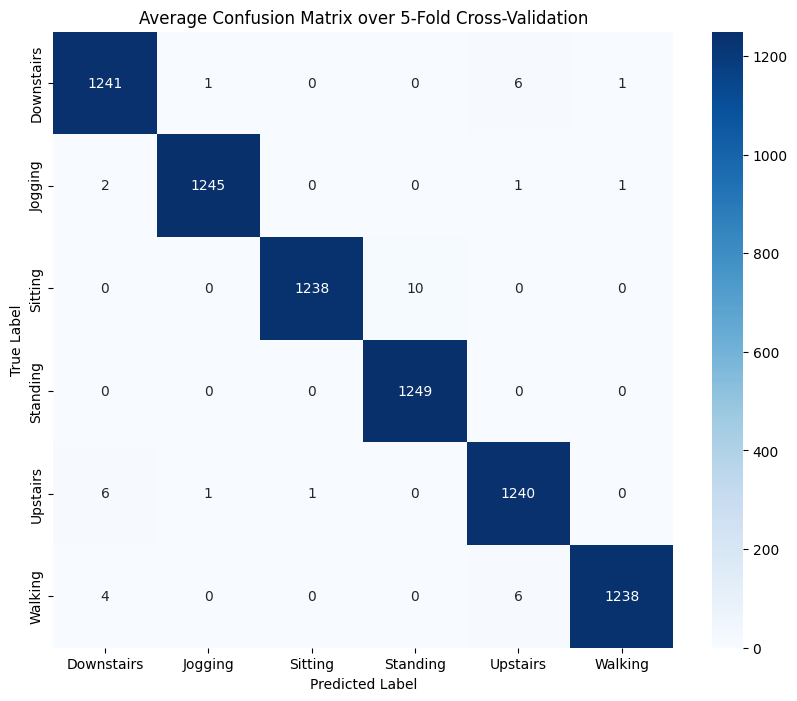


--- Final Evaluation on Unseen Test Data ---
Training final model on entire augmented training data...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8209 - loss: 0.8023 - val_accuracy: 0.7925 - val_loss: 1.7213
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9624 - loss: 0.3099 - val_accuracy: 0.7525 - val_loss: 1.6294
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9710 - loss: 0.2247 - val_accuracy: 0.8089 - val_loss: 1.3670
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9766 - loss: 0.1918 - val_accuracy: 0.8089 - val_loss: 1.2804
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9779 - loss: 0.1704 - val_accuracy: 0.7782 - val_loss: 1.5475
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9802 - loss: 0.1598 - val_accuracy: 0.7706 - val_loss: 1.6292
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9820 - loss: 0.1491 - val_accuracy: 0.8137 - val_loss: 1.5242
Epoch 8/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9817 - loss: 0.1421 

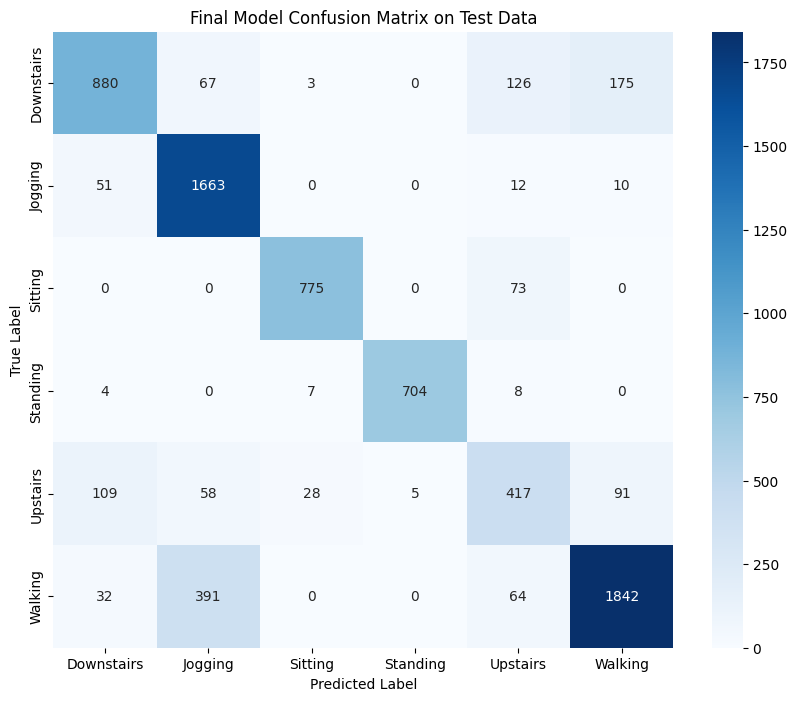

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define the number of folds for cross-validation
# 교차 검증을 위한 겹 수 정의
n_splits = 5 # 5-fold cross-validation

# Initialize StratifiedKFold
# StratifiedKFold 초기화
# shuffle=True is recommended to randomize the data before splitting
# 데이터를 분할하기 전에 무작위화하기 위해 shuffle=True를 권장합니다.
# random_state for reproducibility
# 재현성을 위해 random_state 설정
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results from each fold
# 각 겹의 결과를 저장할 목록
fold_accuracies = []
fold_losses = []
fold_confusion_matrices = []

# Prepare data for cross-validation
# For cross-validation, we will use the augmented training data.
# 교차 검증을 위한 데이터 준비
# 교차 검증을 위해 증강된 훈련 데이터를 사용합니다.
# Ensure X_train_for_training and y_train_for_training are available from the augmentation step
# 증강 단계에서 X_train_for_training 및 y_train_for_training을 사용할 수 있는지 확인합니다.
X_cv = X_train_for_training
y_cv = y_train_for_training

# Define L2 regularization strength
# L2 정규화 강도 정의
l2_lambda = 0.001 # You can adjust this value # 이 값을 조정할 수 있습니다.

# Get the number of output classes from the label encoder
# 레이블 인코더에서 출력 클래스 수를 가져옵니다.
num_classes = len(label_encoder.classes_)

# Define EarlyStopping callback
# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# --- Cross-validation loop ---
# --- 교차 검증 반복문 ---
for fold, (train_index, val_index) in enumerate(skf.split(X_cv, y_cv)):
    print(f"\n--- Processing Fold {fold + 1}/{n_splits} ---")

    # Split data into training and validation sets for the current fold
    # 현재 겹에 대해 데이터를 훈련 및 검증 세트로 분할합니다.
    X_train_fold, X_val_fold = X_cv[train_index], X_cv[val_index]
    y_train_fold, y_val_fold = y_cv[train_index], y_cv[val_index]

    # 1. Model Building (recreate model in each fold)
    # 모델 구축 (각 겹에서 모델 다시 생성)
    model_cv = Sequential()
    # Explicitly set input_shape based on expected window shape (80, 3)
    # 예상되는 윈도우 형태(80, 3)를 기반으로 input_shape를 명시적으로 설정합니다.
    model_cv.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(window_size, 3), kernel_regularizer=l2(l2_lambda)))
    model_cv.add(BatchNormalization())
    model_cv.add(MaxPooling1D(pool_size=2))
    model_cv.add(Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model_cv.add(BatchNormalization())
    model_cv.add(MaxPooling1D(pool_size=2))
    model_cv.add(GlobalAveragePooling1D())
    model_cv.add(BatchNormalization())
    model_cv.add(Dense(units=100, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model_cv.add(Dropout(0.6))
    model_cv.add(Dense(units=num_classes, activation='softmax'))

    # Print the model summary for the first fold (optional)
    # 첫 번째 겹에 대한 모델 요약 출력 (선택 사항)
    if fold == 0:
        print("Model Summary (first fold):")
        model_cv.summary()


    # 2. Model Compilation
    # 모델 컴파일
    model_cv.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

    # Compute class weights for the current fold's training data
    # 현재 겹의 훈련 데이터에 대한 클래스 가중치 계산
    classes_fold = np.unique(y_train_fold)
    class_weights_fold = compute_class_weight(class_weight='balanced', classes=classes_fold, y=y_train_fold)
    class_weight_dict_fold = dict(zip(classes_fold, class_weights_fold))


    # 3. Model Training
    # 모델 훈련
    print("  Training model for this fold...")
    history_fold = model_cv.fit(
        X_train_fold,
        y_train_fold,
        epochs=50, # Increased epochs as Early Stopping will stop training # Early Stopping이 훈련을 중단하므로 에포크를 늘렸습니다.
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping], # Use the early stopping callback # Early stopping 콜백 사용
        class_weight=class_weight_dict_fold, # Apply class weights for the fold # 겹에 대한 클래스 가중치 적용
        verbose=0 # Set verbose to 0 to reduce output during training loop
    )

    # 4. Model Evaluation
    # 모델 평가
    print("  Evaluating model for this fold...")
    loss_fold, accuracy_fold = model_cv.evaluate(X_val_fold, y_val_fold, verbose=0) # Evaluate on the validation fold # 검증 겹에서 평가
    fold_losses.append(loss_fold)
    fold_accuracies.append(accuracy_fold)
    print(f"  Fold {fold + 1} - Validation Loss: {loss_fold:.4f}, Validation Accuracy: {accuracy_fold:.4f}")

    # Get predictions and confusion matrix for the validation fold
    # 검증 겹에 대한 예측 결과 및 혼동 행렬 가져오기
    y_pred_fold = model_cv.predict(X_val_fold, verbose=0)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    cm_fold = confusion_matrix(y_val_fold, y_pred_classes_fold)
    fold_confusion_matrices.append(cm_fold)


# --- Analysis and Reporting ---
# --- 분석 및 보고 ---
print("\n--- Cross-Validation Results ---")
print(f"Validation Accuracies for each fold: {fold_accuracies}")
print(f"Mean Validation Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Standard Deviation of Validation Accuracy: {np.std(fold_accuracies):.4f}")

print(f"\nValidation Losses for each fold: {fold_losses}")
print(f"Mean Validation Loss: {np.mean(fold_losses):.4f}")
print(f"Standard Deviation of Validation Loss: {np.std(fold_losses):.4f}")


# Average Confusion Matrix across folds
# 겹 간 평균 혼동 행렬
# Find the maximum dimensions across all confusion matrices
max_rows = max(cm.shape[0] for cm in fold_confusion_matrices)
max_cols = max(cm.shape[1] for cm in fold_confusion_matrices)

# Pad smaller confusion matrices with zeros to match the maximum dimensions
padded_cms = []
for cm in fold_confusion_matrices:
    pad_rows = max_rows - cm.shape[0]
    pad_cols = max_cols - cm.shape[1]
    padded_cm = np.pad(cm, ((0, pad_rows), (0, pad_cols)), 'constant', constant_values=0)
    padded_cms.append(padded_cm)


average_cm_cv = np.mean(padded_cms, axis=0).astype(int)

print("\nAverage Confusion Matrix over Cross-Validation Folds (rounded to nearest integer):")
print(average_cm_cv)

# Plotting the average confusion matrix (optional)
if 'label_encoder' in locals():
    # Ensure the activity classes list matches the dimensions of the padded matrix
    # 패딩된 행렬의 차원과 활동 클래스 목록이 일치하는지 확인
    activity_classes_cv = label_encoder.classes_[:max_rows] # Take only relevant classes
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_cm_cv, annot=True, fmt='d', cmap='Blues', xticklabels=activity_classes_cv, yticklabels=activity_classes_cv)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Average Confusion Matrix over {n_splits}-Fold Cross-Validation')
    plt.show()
else:
    print("Label encoder not found. Cannot plot confusion matrix with labels.")

# --- Final Evaluation on Unseen Test Data (Optional after selecting best model or averaging) ---
# You can choose to train a final model on the entire augmented training data (X_cv, y_cv)
# and evaluate it on the unseen test data (X_test, y_test) after cross-validation.
# This provides an estimate of how the model generalizes to entirely new data.
# 또는 교차 검증 후 전체 증강 훈련 데이터 (X_cv, y_cv)에 대해 최종 모델을 훈련하고
# 보이지 않는 테스트 데이터 (X_test, y_test)에서 평가할 수 있습니다.
# 이렇게 하면 모델이 완전히 새로운 데이터에 대해 얼마나 잘 일반화되는지 추정할 수 있습니다.

print("\n--- Final Evaluation on Unseen Test Data ---")

# Recreate and train a model on the entire augmented training data
# 전체 증강 훈련 데이터에 대해 모델을 다시 생성하고 훈련합니다.
final_model = Sequential()
final_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(window_size, 3), kernel_regularizer=l2(l2_lambda)))
final_model.add(BatchNormalization())
final_model.add(MaxPooling1D(pool_size=2))
final_model.add(Conv1D(filters=256, kernel_size=3, activation='relu', kernel_regularizer=l2(l2_lambda)))
final_model.add(BatchNormalization())
final_model.add(MaxPooling1D(pool_size=2))
final_model.add(GlobalAveragePooling1D())
final_model.add(BatchNormalization())
final_model.add(Dense(units=100, activation='relu', kernel_regularizer=l2(l2_lambda)))
final_model.add(Dropout(0.6))
final_model.add(Dense(units=num_classes, activation='softmax'))

final_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Compute class weights for the entire augmented training data
# 전체 증강 훈련 데이터에 대한 클래스 가중치 계산
classes_final_train = np.unique(y_cv)
class_weights_final_train = compute_class_weight(class_weight='balanced', classes=classes_final_train, y=y_cv)
class_weight_dict_final_train = dict(zip(classes_final_train, class_weights_final_train))


# Define EarlyStopping for the final training
# 최종 훈련을 위한 EarlyStopping 정의
early_stopping_final = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Monitor validation loss from X_val/y_val # X_val/y_val에서 검증 손실 모니터링


print("Training final model on entire augmented training data...")
# Train the final model on the entire augmented training data (X_cv, y_cv)
# Using the original validation data (X_val, y_val) for monitoring Early Stopping
# 전체 증강 훈련 데이터 (X_cv, y_cv)에 대해 최종 모델을 훈련합니다.
# Early Stopping 모니터링을 위해 원래 검증 데이터 (X_val, y_val) 사용
final_history = final_model.fit(
    X_cv, # Use the combined augmented training data # 결합된 증강 훈련 데이터 사용
    y_cv, # Use the corresponding labels # 해당 레이블 사용
    epochs=50, # Allow more epochs as Early Stopping will control # Early Stopping이 제어하므로 더 많은 에포크 허용
    batch_size=32,
    validation_data=(X_val, y_val), # Use the original validation set for monitoring # 모니터링을 위해 원래 검증 세트 사용
    callbacks=[early_stopping_final],
    class_weight=class_weight_dict_final_train, # Apply class weights to final training # 최종 훈련에 클래스 가중치 적용
    verbose=1 # Set verbose to 1 to see progress of final training # 최종 훈련 진행 상황을 보려면 verbose를 1로 설정
)


# Evaluate the final model on the unseen test data
# 보이지 않는 테스트 데이터에서 최종 모델을 평가합니다.
print("\nEvaluating final model on test data...")
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)

print(f"\nFinal Model Test Loss: {test_loss:.4f}")
print(f"Final Model Test Accuracy: {test_accuracy:.4f}")

# Get predictions and confusion matrix for the test data using the final model
# 최종 모델을 사용하여 테스트 데이터에 대한 예측 결과 및 혼동 행렬 가져오기
y_pred_final = final_model.predict(X_test, verbose=1)
y_pred_classes_final = np.argmax(y_pred_final, axis=1)
cm_final = confusion_matrix(y_test, y_pred_classes_final)

print("\nFinal Model Confusion Matrix on Test Data:")
print(cm_final)

# Plotting the final confusion matrix (optional)
if 'label_encoder' in locals():
    activity_classes_final = label_encoder.classes_
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=activity_classes_final, yticklabels=activity_classes_final)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Final Model Confusion Matrix on Test Data')
    plt.show()
else:
    print("Label encoder not found. Cannot plot confusion matrix with labels.")

## CNN 모델 컴파일

### Subtask:
손실 함수, 옵티마이저 및 평가 메트릭을 사용하여 모델을 컴파일합니다.


**Reasoning**:
Compile the CNN model with the specified loss function, optimizer, and metrics.



In [ ]:
# Compile the model
# 모델을 컴파일합니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels # 정수 레이블에 대해 sparse_categorical_crossentropy 사용
              metrics=['accuracy']) # 평가 지표: 정확도

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 78, 128)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 78, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 37, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,706 (502.76 KB)

 Trainable params: 127,426 (497.76 KB)

 Non-trainable params: 1,280 (5.00 KB)

## CNN 모델 훈련

### Subtask:
훈련 데이터를 사용하여 CNN 모델을 훈련합니다.


**Reasoning**:
Train the compiled CNN model using the training data and validate it using the validation data, storing the training history.



In [ ]:
# Define the number of epochs and batch size
# 에포크 수와 배치 크기를 정의합니다.
epochs = 10 # Increased epochs since Early Stopping will stop training when validation loss stops improving # 검증 손실 개선이 멈추면 Early Stopping이 훈련을 중단하므로 에포크를 늘렸습니다.
batch_size = 32

# Import EarlyStopping and compute_class_weight
# EarlyStopping 및 compute_class_weight 가져오기
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define EarlyStopping callback
# EarlyStopping 콜백 정의
# Monitor validation loss and stop training if it doesn't improve for 5 consecutive epochs
# 검증 손실을 모니터링하고 5 에포크 연속 개선되지 않으면 훈련을 중단합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compute class weights
# 클래스 가중치 계산
# Use the integer labels from y_train directly
# y_train의 정수 레이블을 직접 사용합니다.
y_train_int = y_train # y_train already contains integer labels # y_train에는 이미 정수 레이블이 포함되어 있습니다.

classes = np.unique(y_train_int)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_int)

# Create a dictionary of class weights
class_weight_dict = dict(zip(classes, class_weights))

print("Computed Class Weights:", class_weight_dict)

# Print the shape of X_train just before passing it to model.fit
# model.fit에 전달하기 직전 X_train의 형태를 출력합니다.
print(f"\nShape of X_train before model.fit: {X_train.shape}")

# Train the model
# 모델을 훈련합니다.
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weight_dict # Add class weights here # 여기에 클래스 가중치 추가
)

# Print training and validation accuracy and loss from the history
# 기록에서 훈련 및 검증 정확도와 손실을 출력합니다.
print("\nTraining History:")
print("Epoch | Train Loss | Train Acc | Val Loss | Val Acc")
print("---------------------------------------------------")
# Check if history object and its attributes are valid before printing
if history is not None and history.history is not None:
    # Ensure all required keys are in history.history
    if all(key in history.history for key in ['loss', 'accuracy', 'val_loss', 'val_accuracy']):
        for epoch in range(len(history.history['loss'])): # Iterate through the actual number of epochs run # 실제로 실행된 에포크 수만큼 반복
            # Safely get history values, providing a default if a key or index is missing
            loss_val = history.history.get('loss', [])[epoch] if epoch < len(history.history.get('loss', [])) else 'N/A'
            acc_val = history.history.get('accuracy', [])[epoch] if epoch < len(history.history.get('accuracy', [])) else 'N/A'
            val_loss_val = history.history.get('val_loss', [])[epoch] if epoch < len(history.history.get('val_loss', [])) else 'N/A'
            val_acc_val = history.history.get('val_accuracy', [])[epoch] if epoch < len(history.history.get('val_accuracy', [])) else 'N/A'

            print(
                f"{epoch + 1:<5} | "
                f"{loss_val:<10.4f} | "
                f"{acc_val:<9.4f} | "
                f"{val_loss_val:<9.4f} | "
                f"{val_acc_val:<8.4f}"
            )
    else:
        print("Error: Missing required keys in training history.")
else:
    print("Error: Training history is not available.")

Computed Class Weights: {np.int64(0): np.float64(1.0866736377367259), np.int64(1): np.float64(0.7064732985875066), np.int64(2): np.float64(1.6627555555555555), np.int64(3): np.float64(2.133926534337212), np.int64(4): np.float64(1.696227783822996), np.int64(5): np.float64(0.49882666666666664)}

Shape of X_train before model.fit: (18706, 80, 3)
Epoch 1/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9209 - loss: 0.5141 - val_accuracy: 0.7615 - val_loss: 1.4381
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9475 - loss: 0.3689 - val_accuracy: 0.7911 - val_loss: 1.3125
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9623 - loss: 0.2917 - val_accuracy: 0.7711 - val_loss: 1.3695
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.2409 - val_accuracy: 0.7930 - val_loss: 1.3968
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9727 - loss: 0.2216 - val_accuracy: 0.7354 - val_loss: 1.4264
Epoch 6/10
58

## CNN 모델 평가

### Subtask:
테스트 데이터에서 훈련된 모델의 성능을 평가합니다.

**Reasoning**:
Evaluate the trained CNN model on the test data to assess its performance on unseen data and print the evaluation results (loss and accuracy).

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8170 - loss: 0.9026

Test Loss: 1.2044
Test Accuracy: 0.7955
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix (text format):
[[ 874   33    1    0  187  156]
 [  89 1429    0    0  191   27]
 [   0    0  773    0   75    0]
 [   2    0   22  573  126    0]
 [  95    6   37    1  541   28]
 [ 146  172    0    0  159 1852]]


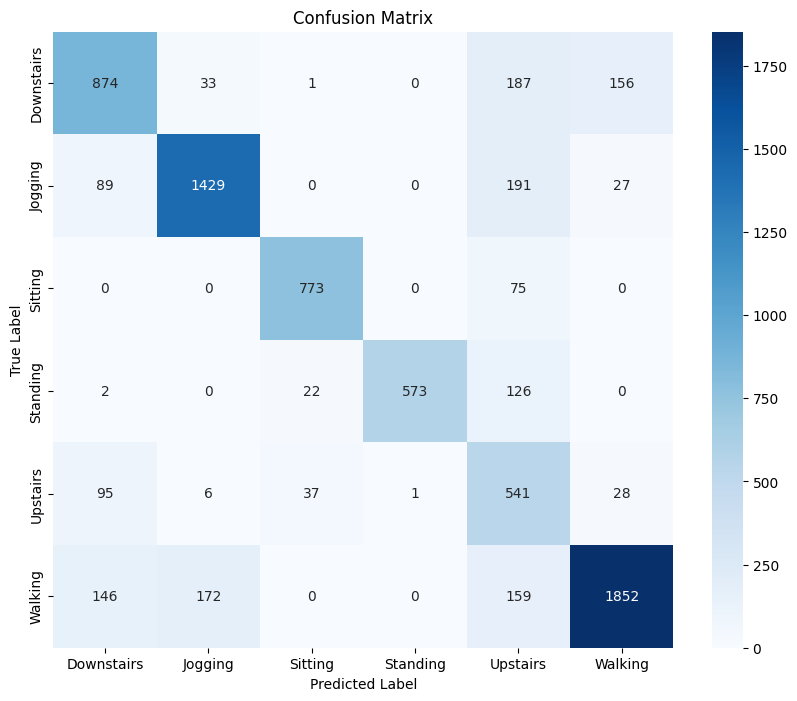

In [ ]:
# Evaluate the model on the test data
# 테스트 데이터에서 모델을 평가합니다.
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
# 평가 결과를 출력합니다.
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test data
# 테스트 데이터에 대한 예측 결과를 가져옵니다.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
# 컨퓨전 매트릭스를 생성합니다.
cm_before_smote = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix in text format
# 컨퓨전 매트릭스를 텍스트 형식으로 출력합니다.
print("Confusion Matrix (text format):")
print(cm_before_smote)

# Get the activity class names from the label encoder
# 레이블 인코더에서 활동 클래스 이름을 가져옵니다.
activity_classes = label_encoder.classes_

# Plot the confusion matrix (optional, can be removed if only text is desired)
# 컨퓨전 매트릭스를 플롯합니다 (선택 사항, 텍스트만 원하는 경우 제거 가능).
plt.figure(figsize=(10, 8))
sns.heatmap(cm_before_smote, annot=True, fmt='d', cmap='Blues', xticklabels=activity_classes, yticklabels=activity_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()